In [1]:
import pandas as pd
import P2G7_pipeline_utils as p_utils
#from P2G7_pipeline_utils import healthcare_model_generator

In [2]:
# create dataframe from .csv file "healthcare-dataset-stroke-data.csv". The source data was downlaoded from XXXX
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Get info on all features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Determine if dropping null, or not, is better for accuracy. Used Logistic Regression model in pipeline to determine 
# Mean Squared Error and R-squared for each scenario.
healthcare_model = p_utils.healthcare_model_generator(df)

Dropped 3.93% rows
Testing dropped NAs
Mean Squared Error: 0.04234527687296417
R-squared: -0.04421768707483009
Adjusted R-squared: 0.9572716655237442
Testing no dropped data
Mean Squared Error: 0.05555555555555555
R-squared: -0.05882352941176472
Adjusted R-squared: 0.9439617342460944
Returning dropped NAs pipeline


In [5]:
# Analyze bmi value to determine appropriate value for nulls
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [6]:
# Recommended not to drop null. Filling in null bmi with mean of bmi value. New df returned from pipeline - df_bmi_filled. 
df_copy = df.copy()
df_bmi_filled = p_utils.fill_bmi_na(df_copy)
df_bmi_filled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [7]:
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

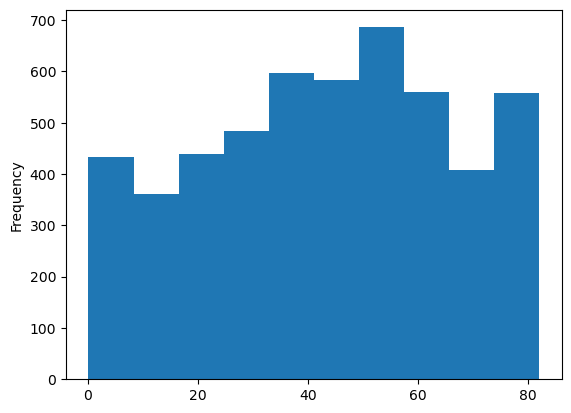

In [8]:
#do age binning. check age distribution in historgram.select bin size based on counts.
df["age"].plot(kind="hist")

In [9]:
# Bin age as it is a continuous variable and unqique (some repetation). We want to minimize unique features
df_bmi_filled_age_bin = p_utils.bin_age(df_bmi_filled)
df_bmi_filled_age_bin.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [10]:
# Drop unique features id and age
df_drop_id_age = p_utils.drop_id_age(df_bmi_filled_age_bin)
df_drop_id_age.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [11]:
df_drop_id_age['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [12]:
# Drop row with feature gender = Other
df_final = p_utils.delete_gender_other(df_drop_id_age)
df_final.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,3
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,4
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,4


In [13]:
df_final['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [14]:
df_final["work_type"].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [15]:
df_final["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [16]:
encoders = p_utils.build_encoders(df_final)
encoders

[{'column': 'smoking_status',
  'multi_col_output': True,
  'encoder': OneHotEncoder(sparse_output=False)},
 {'column': 'work_type',
  'multi_col_output': True,
  'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)},
 {'column': 'Residence_type',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['Urban', 'Rural']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'gender',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['Male', 'Female']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'ever_married',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['No', 'Yes']], handle_unknown='use_encoded_value',
                 unknown_value=-1)}]

In [17]:
df_encoded = p_utils.encode_categorical(df_final, encoders)

df_encoded.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,0,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,202.21,28.893237,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,1,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,171.23,34.400000,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1,0,174.12,24.000000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [18]:
df_encoded["x0_Unknown"].value_counts()

x0_Unknown
0.0    3565
1.0    1544
Name: count, dtype: int64

In [19]:
df_encoded_final = p_utils.change_smoking_status_Unknown(df_encoded)
df_encoded_final.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
0,0,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,202.21,28.893237,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0,1,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,0,171.23,34.400000,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1,0,174.12,24.000000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [20]:
df_encoded_final["x0_Unknown"].value_counts()

x0_Unknown
 0.0    3565
-1.0    1544
Name: count, dtype: int64

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = p_utils.train_test_split_healthcare(df_encoded_final)
X_train.head()

,hypertension,heart_disease,avg_glucose_level,bmi,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,Residence_type,gender,ever_married
4113,0,0,64.68,23.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3735,1,0,153.08,21.5,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3514,0,0,102.10,22.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2229,1,0,104.42,37.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4294,0,0,132.46,26.2,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [22]:
y_train.head()

4113    0
3735    0
3514    0
2229    0
4294    0
Name: stroke, dtype: int64

In [23]:
# Count the number of rows in each X dataframe
X_train_rows = len(X_train)
X_test_rows = len(X_test)

# Print the results
print("Number of rows in X_train:", X_train_rows)
print("Number of rows in X_test:", X_test_rows)

Number of rows in X_train: 3831
Number of rows in X_test: 1278


In [24]:
# Count the number of rows in each y dataframe
y_train_rows = len(X_train)
y_test_rows = len(X_test)

# Print the results
print("Number of rows in y_train:", y_train_rows)
print("Number of rows in y_test:", y_test_rows)

Number of rows in y_train: 3831
Number of rows in y_test: 1278
